In [35]:
import numpy as np
import pandas as pd
from divik._matlab_legacy import find_thresholds
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("data.csv", index_col=0)

In [19]:
data.shape

(33694, 3222)

In [20]:
data.columns[data.isna().any()].tolist()

[]

In [40]:
x = np.count_nonzero(data, axis=1)
x = np.log(x+np.full(x.shape,1))

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

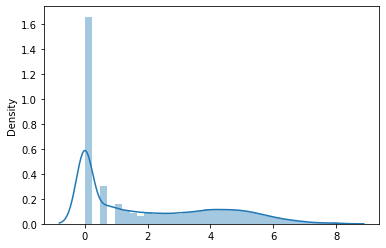

In [42]:
sns.distplot(x)

In [43]:
find_thresholds(x, max_components=10)

array([4.99209389e-03, 7.02826950e-01, 1.11058349e+00, 1.39961916e+00,
       1.62376517e+00, 1.80585203e+00, 2.38739252e+00, 3.27126684e+00,
       7.89715933e+00])

In [47]:
thr = 1.6

In [49]:
is_in_filtered = x > thr

In [52]:
filtered = data[is_in_filtered]

In [53]:
filtered.shape

(15821, 3222)

In [59]:
filtered = pd.DataFrame(filtered)
filtered.to_csv("filtered_pbmc.csv")